In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [3]:
# Load the data
file_path = r"C:\Users\nahid\Desktop\Project USFS\Data\WASHINGTON_DC_2013_ndvi_metrics_cover.csv"
df = pd.read_csv(file_path)

# Select the dependent variable (NDVI)
y = df['NDVIMEAN']  

# Select the independent variables (land cover classifications)
X = df[['WATER', 'IMPERVIOUS', 'SOIL_BARREN', 'TREES_FOREST', 
        'GRASS_HERBACEOUS', 'AGRICULTURE', 'WOODY_WETLANDS', 
        'EMERGENT_WETLANDS']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
# Build the model
model = Sequential()

# Input layer
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


c:\Users\nahid\Desktop\Project USFS\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/100
120302/120302 ━━━━━━━━━━━━━━━━━━━━ 236s 2ms/step - loss: 0.0119 - mae: 0.0791 - val_loss: 0.0101 - val_mae: 0.0735
Epoch 2/100
120302/120302 ━━━━━━━━━━━━━━━━━━━━ 190s 2ms/step - loss: 0.0108 - mae: 0.0758 - val_loss: 0.0101 - val_mae: 0.0737
Epoch 3/100
120302/120302 ━━━━━━━━━━━━━━━━━━━━ 150s 1ms/step - loss: 0.0108 - mae: 0.0759 - val_loss: 0.0109 - val_mae: 0.0762
Epoch 4/100
120302/120302 ━━━━━━━━━━━━━━━━━━━━ 150s 1ms/step - loss: 0.0109 - mae: 0.0761 - val_loss: 0.0102 - val_mae: 0.0743
Epoch 5/100
120302/120302 ━━━━━━━━━━━━━━━━━━━━ 188s 2ms/step - loss: 0.0112 - mae: 0.0767 - val_loss: 0.0104 - val_mae: 0.0746
Epoch 6/100
120302/120302 ━━━━━━━━━━━━━━━━━━━━ 172s 1ms/step - loss: 0.0111 - mae: 0.0766 - val_loss: 0.0102 - val_mae: 0.0743
Epoch 7/100
120302/120302 ━━━━━━━━━━━━━━━━━━━━ 155s 1ms/step - loss: 0.0114 - mae: 0.0771 - val_loss: 0.0110 - val_mae: 0.0754
Epoch 8/100
120302/120302 ━━━━━━━━━━━━━━━━━━━━ 156s 1ms/step - loss: 0.0113 - mae: 0.0770 - val_loss: 0.0102 - 

In [6]:
# Evaluate the model on the test data
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)

# Predict on test data
y_pred = model.predict(X_test_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Test MAE: {test_mae}")
print(f"Test RMSE: {rmse}")


37595/37595 ━━━━━━━━━━━━━━━━━━━━ 21s 554us/step - loss: 0.0124 - mae: 0.0829
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 21s 558us/step
Test MAE: 0.08304330706596375
Test RMSE: 0.11138310884867422


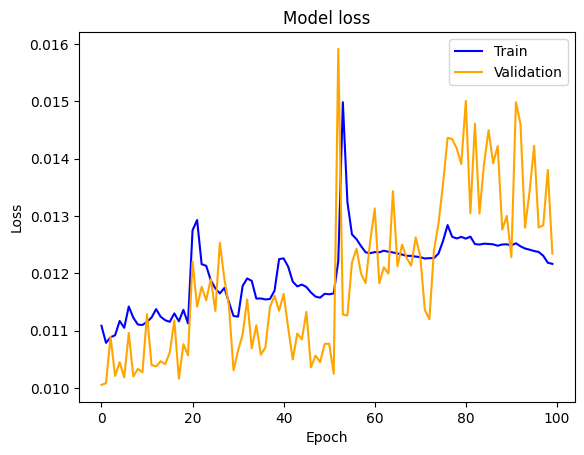

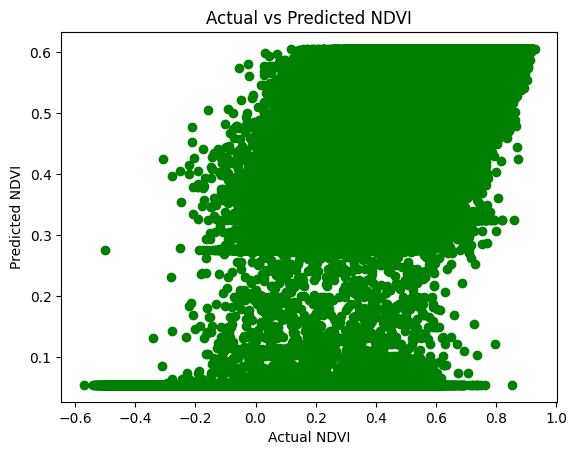

In [13]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='orange')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot predictions vs actual with different colors
plt.scatter(y_test, y_pred, c='green')  # Use green color for the scatter plot
plt.xlabel('Actual NDVI')
plt.ylabel('Predicted NDVI')
plt.title('Actual vs Predicted NDVI')
plt.show()



37595/37595 ━━━━━━━━━━━━━━━━━━━━ 21s 547us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 26s 680us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 28s 735us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 27s 720us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 28s 752us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 27s 714us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 27s 730us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 29s 770us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 26s 682us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 25s 658us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 25s 676us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 25s 672us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 25s 661us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 25s 664us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 25s 663us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 25s 666us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 27s 728us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 32s 860us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 28s 740us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 27s 717us/step
37595/37595 ━━━━━━━━━━━━━━━━━━━━ 26s 702

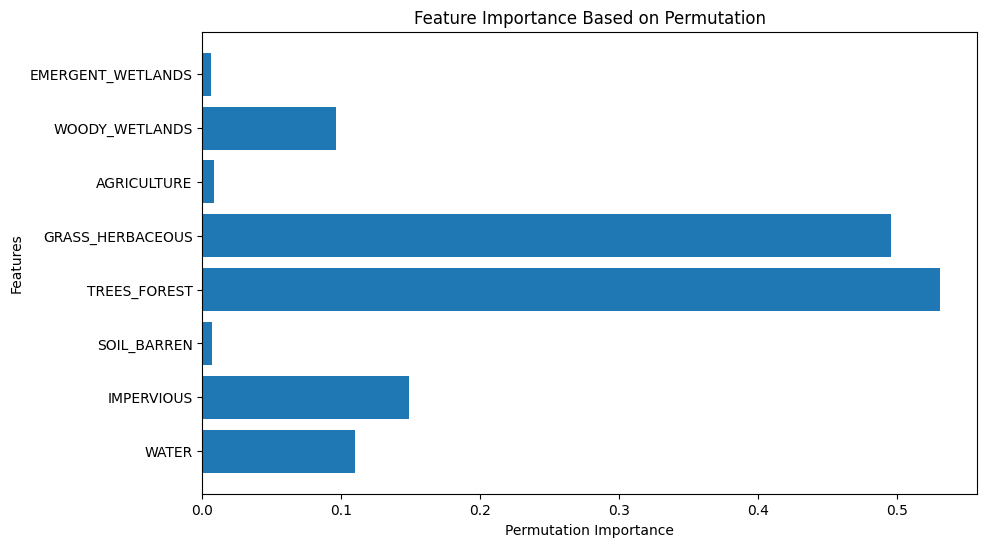

In [8]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
result = permutation_importance(model, X_test_scaled, y_test, n_repeats=10, random_state=42, scoring='neg_mean_squared_error')

# Get the importance of each feature
importance = result.importances_mean

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importance)
plt.xlabel('Permutation Importance')
plt.ylabel('Features')
plt.title('Feature Importance Based on Permutation')
plt.show()
